<a href="https://colab.research.google.com/github/popitree/deep-learning/blob/master/3_Multiclass_Classification_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import reuters

In [0]:
# 11228 datasets with 46 different topics
 (train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [0]:
word_index = reuters.get_word_index()

In [0]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items() ])

In [0]:
def get_news(word_index_arr):
  return " ".join([reverse_word_index.get(i - 3, '?') for i in word_index_arr])

# 0 1 2 are reverse inidices of padding, start of sequence and unknown

In [0]:
print("Topic: "+get_news(train_data[123]))
print("Topic: "+get_news(train_data[130]))

Topic: ? there were six grain ships loading and six ships were waiting to load at portland according to the portland merchants exchange reuter 3
Topic: ? delta air lines lt ? said a court order requiring western air lines lt ? to ? with two of its unions will not delay the april 1 merger between the two airlines the order which was issued by the ? circuit court of appeals requires western to discuss with its two unions whether western's labor contracts will be binding for delta delta said nevertheless the court order could cause significant personnel problems including the possible delay of wage increases delta had planned to give the western personnel on april 1 ronald allen ? president said delta said it feels the court has ? and should reconsider the order reuter 3


In [0]:
train_label[10:30]

array([ 3,  3,  4,  4, 19,  8, 16,  3,  3, 21, 11,  4,  4,  3,  3,  1,  3,
        1,  3, 16])

In [0]:
print(train_data[123])

[1, 144, 62, 155, 361, 1094, 2618, 9, 155, 1094, 62, 2143, 6, 3177, 28, 3298, 519, 6, 4, 3298, 4444, 108, 17, 12]


We can vectorize the train and test data

In [0]:
import numpy as np
def vectorize_sequence(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))  # create a 2d array of 0
  for idx,sequence in enumerate(sequences):
    results[idx, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

Now we need to vectorize the tables, either with keras inbuilt to_categorical or like previous code
https://keras.io/datasets/#reuters-newswire-topics-classification
We have 46 labels

In [0]:
def to_one_hot_encode(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for idx,label in enumerate(labels):
    results[idx, label] = 1
  return results

one_hot_train_labels = to_one_hot_encode(train_label)
one_hot_test_lables  = to_one_hot_encode(test_label)


In [0]:
print(train_label[123])
print(one_hot_train_labels[123])


1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Building your network

# the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

# In a stack of Dense layers like that you’ve been using, each layer can only access information present in the output of the previous layer. 
# If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck.
# In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: 
# such small layers may act as information bottlenecks, permanently dropping relevant information.
# For this reason you’ll use larger layers. Let’s go with 64 units.

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [0]:
# The best loss function to use here is categorical_crossentropy 
# It measures the distance between two probability distribution 
# Here input and output
# In input it is like 0 0 0 1 0 0  etc in output 0.02 0.05 0.03 0.6 0.2 0.1  etc
# sum is 1 for bot probability distribution

In [0]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Setting aside validation set, take first 1000 records aside
record_cnt_for_validation = 1000

x_val = x_train[:record_cnt_for_validation]
partial_x_train = x_train[record_cnt_for_validation:]

y_val = one_hot_train_labels[:record_cnt_for_validation]
partial_y_train = one_hot_train_labels[record_cnt_for_validation:]





In [0]:
# Let us train the model
history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    batch_size=512,
                    epochs = 20,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.7425 - accuracy: 0.4932 - val_loss: 1.8257 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4677 - accuracy: 0.6983 - val_loss: 1.3438 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0715 - accuracy: 0.7701 - val_loss: 1.1472 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8488 - accuracy: 0.8222 - val_loss: 1.0366 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6780 - accuracy: 0.8612 - val_loss: 0.9777 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.5515 - accuracy: 0.8887 - val_loss: 0.9507 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4472 - accuracy: 0.9105 - val_loss: 0.9182 - val_accuracy: 0.8080
Epoch 8/20
16

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
import matplotlib.pyplot as plt

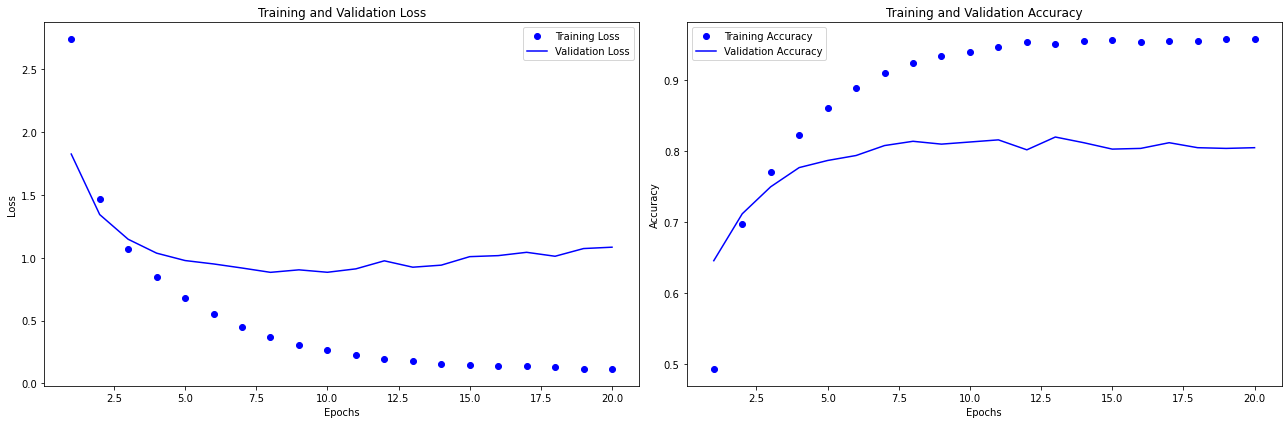

In [0]:
loss = history.history['loss']
val_loss =  history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# epochs was 20
epochs = range(1, len(loss)+1)

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(122)
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()

plt.show()




In [0]:
# So we can see after 9 or 10 epochs the network tends to overfit

model_final = models.Sequential()
model_final.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_final.add(layers.Dense(64,activation='relu'))
model_final.add(layers.Dense(46,activation='softmax'))


model_final.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

model_final.fit(x=partial_x_train,
                    y=partial_y_train,
                    batch_size=512,
                    epochs = 9,
                    validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 55ms/step - loss: 2.5618 - accuracy: 0.4940 - val_loss: 1.7145 - val_accuracy: 0.6600
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4132 - accuracy: 0.7091 - val_loss: 1.3153 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0504 - accuracy: 0.7736 - val_loss: 1.1217 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8218 - accuracy: 0.8257 - val_loss: 1.0238 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6492 - accuracy: 0.8647 - val_loss: 0.9544 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5152 - accuracy: 0.8940 - val_loss: 0.9240 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4154 - accuracy: 0.9136 - val_loss: 0.9267 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [0]:
results = model_final.evaluate(x_test, one_hot_test_lables)
# It returns loss value and metric

71/71 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.7836


In [0]:
results

[1.002669334411621, 0.7836152911186218]

In [0]:
# So accuracy is almost 78%
# Let us see if we use random classifier
import copy
test_labesl_copy = copy.copy(test_label)
np.random.shuffle(test_labesl_copy)

#guess_match_arry
hits_array = np.array(test_label) == np.array(test_labesl_copy)
np.sum(hits_array)/len(hits_array)

0.18788958147818344

In [0]:
# For binary classifier by pure random guesses the accuracy should be close to 50%
# But for this multi class classifier it should be less
# And in our case we got accuracy of around 19%.
# And our model is giving accuracy of close to 80%

In [0]:
# Let us generate predictions

In [0]:
predictions = model.predict(x_test)
predictions.shape

(2246, 46)

In [0]:
predictions[0]

array([1.1558558e-06, 1.6050630e-05, 9.4670000e-08, 7.1309644e-01,
       2.7964967e-01, 9.0426840e-07, 6.1943332e-08, 7.3294029e-07,
       1.6696294e-04, 5.1635252e-06, 2.2248705e-06, 6.2222738e-04,
       2.1237436e-06, 2.7431188e-05, 3.8174992e-08, 1.3685626e-07,
       4.9983475e-05, 2.6525800e-07, 7.9449101e-06, 5.6314273e-03,
       4.9625419e-04, 3.1022366e-05, 1.9598745e-07, 3.2260357e-06,
       1.0692223e-06, 1.6645530e-06, 7.1689671e-10, 1.2739223e-06,
       1.5854703e-06, 1.2849402e-04, 4.7419335e-06, 3.1318407e-07,
       8.1780524e-07, 1.6921361e-07, 3.3080360e-06, 1.9670847e-06,
       2.9171262e-05, 1.0418433e-06, 1.9858081e-07, 5.0923876e-07,
       3.2158957e-06, 7.5860480e-06, 4.4938366e-07, 5.2394466e-07,
       1.3668794e-08, 8.9861302e-08], dtype=float32)

In [0]:
print("Index\tPredicted\tActual")

for i in range(10):
  id = np.random.randint(100,500)

  print("{} \t {} \t\t {}".format(id, np.argmax(predictions[id]), test_label[id]))


Index	Predicted	Actual
407 	 3 		 3
495 	 4 		 25
343 	 3 		 3
409 	 3 		 3
396 	 3 		 3
343 	 3 		 3
175 	 21 		 21
424 	 3 		 3
323 	 19 		 8
283 	 4 		 4


In [0]:
np.sum(predictions[0])

1.0

In [0]:
# Different way of handling labels and the loss
# Another way to encode the labels is to cast them as INT Tensors
y_train = np.array(train_label)
y_test = np.array(test_label)

# with this approach the loss function should change

model_final.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [0]:
# The importance of having Large Intermediate Layesr
# If we reduce we will reach bottleneck

model_final = models.Sequential()
model_final.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_final.add(layers.Dense(4,activation='relu'))
model_final.add(layers.Dense(46,activation='softmax'))


model_final.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

new_hist = model_final.fit(x=partial_x_train,
                    y=partial_y_train,
                    batch_size=512,
                    epochs = 9,
                    validation_data = (x_val, y_val))
model_final.evaluate (x_test, one_hot_test_lables)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.5358 - accuracy: 0.0871 - val_loss: 3.2543 - val_accuracy: 0.2270
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 3.0674 - accuracy: 0.2275 - val_loss: 2.8969 - val_accuracy: 0.2420
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 2.7160 - accuracy: 0.2434 - val_loss: 2.6129 - val_accuracy: 0.2480
Epoch 4/9
16/16 [==============================] - 1s 41ms/step - loss: 2.4143 - accuracy: 0.2527 - val_loss: 2.3484 - val_accuracy: 0.2620
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 2.1153 - accuracy: 0.4763 - val_loss: 2.0834 - val_accuracy: 0.5650
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 1.8187 - accuracy: 0.6163 - val_loss: 1.8689 - val_accuracy: 0.5940
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 1.6028 - accuracy: 0.6396 - val_loss: 1.7205 - val_accuracy: 0.6180
Epoch 8/9
16/16 [===

[1.6527860164642334, 0.6340160369873047]

In [0]:
np.mean(new_hist.history['val_accuracy'])

0.4449999945031272

In [0]:
#63% accuracy and 44% validation accuracy